# BBC Dataset Profiling

In [26]:
from ydata_profiling import ProfileReport
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use('dark_background')


In [27]:
bbc_df = pd.read_csv("_data/bbc_dataset_preprocessed.csv")
bbc_df


file_name  category                                               text  \
0      001.txt  business  Ad sales boost Time Warner profit\n\nQuarterly...   
1      002.txt  business  Dollar gains on Greenspan speech\n\nThe dollar...   
2      003.txt  business  Yukos unit buyer faces loan claim\n\nThe owner...   
3      004.txt  business  High fuel prices hit BA's profits\n\nBritish A...   
4      005.txt  business  Pernod takeover talk lifts Domecq\n\nShares in...   
...        ...       ...                                                ...   
2220   397.txt      tech  BT program to beat dialler scams\n\nBT is intr...   
2221   398.txt      tech  Spam e-mails tempt net shoppers\n\nComputer us...   
2222   399.txt      tech  Be careful how you code\n\nA new European dire...   
2223   400.txt      tech  US cyber security chief resigns\n\nThe man mak...   
2224   401.txt      tech  Losing yourself in online gaming\n\nOnline rol...   

                                           cleaned_text  \
0     ad sales boost time warner profit quarterly pr...   
1     dollar gains on greenspan speech the dollar ha...   
2     yukos unit buyer faces loan claim the owners o...   
3     high fuel prices hit ba s profits british airw...   
4     pernod takeover talk lifts domecq shares in uk...   
...                                                 ...   
2220  bt program to beat dialler scams bt is introdu...   
2221  spam e mails tempt net shoppers computer users...   
2222  be careful how you code a new european directi...   
2223  us cyber security chief resigns the man making...   
2224  losing yourself in online gaming online role p...   

                                        normalized_text  
0     ad sale boost time warner profit quarterly pro...  
1     dollar gain greenspan speech dollar hit highes...  
2     yukos unit buyer face loan claim owner embattl...  
3     high fuel price hit ba profit british airway b...  
4     pernod takeover talk lift domecq share uk drin...  
...                                                 ...  
2220  bt program beat dialler scam bt introducing tw...  
2221  spam e mail tempt net shopper computer user ac...  
2222  careful code new european directive could put ...  
2223  u cyber security chief resigns man making sure...  
2224  losing online gaming online role playing game ...  

[2225 rows x 5 columns]

## Column Descriptions

| Column Name | Description |
|-------------|-------------|
| **file_name** | The identifier of the source text file in the format "XXX.txt" where XXX is a 3-digit number (e.g., "001.txt"). This comes from the original structure of the data which we transformed in the preprocess step. |
| **category** | The topical category of the news article. The categories include "business", "tech", "politics", "sport", and "entertainment". |
| **text** | The original, raw text content of the news article including the title and body. This column preserves the original formatting, capitalization, and punctuation. |
| **cleaned_text** | A preprocessed version of the text that has undergone basic cleaning including: conversion to lowercase, removal of punctuation and special characters, removal of numbers, and normalization of whitespace. This makes the text more consistent for analysis. |
| **normalized_text** | Text that has undergone tokenization (temporarily split into words), stopword removal, and lemmatization, then rejoined into a space-separated string. This represents the text in its most analysis-ready form. |

In [28]:
print("\n--- Basic Dataset Information ---")
bbc_df.info()



--- Basic Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   file_name        2225 non-null   object
 1   category         2225 non-null   object
 2   text             2225 non-null   object
 3   cleaned_text     2225 non-null   object
 4   normalized_text  2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB


So we dont have any null/NaN values.

### 1. Category Distribution


--- Category Distribution ---
category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64


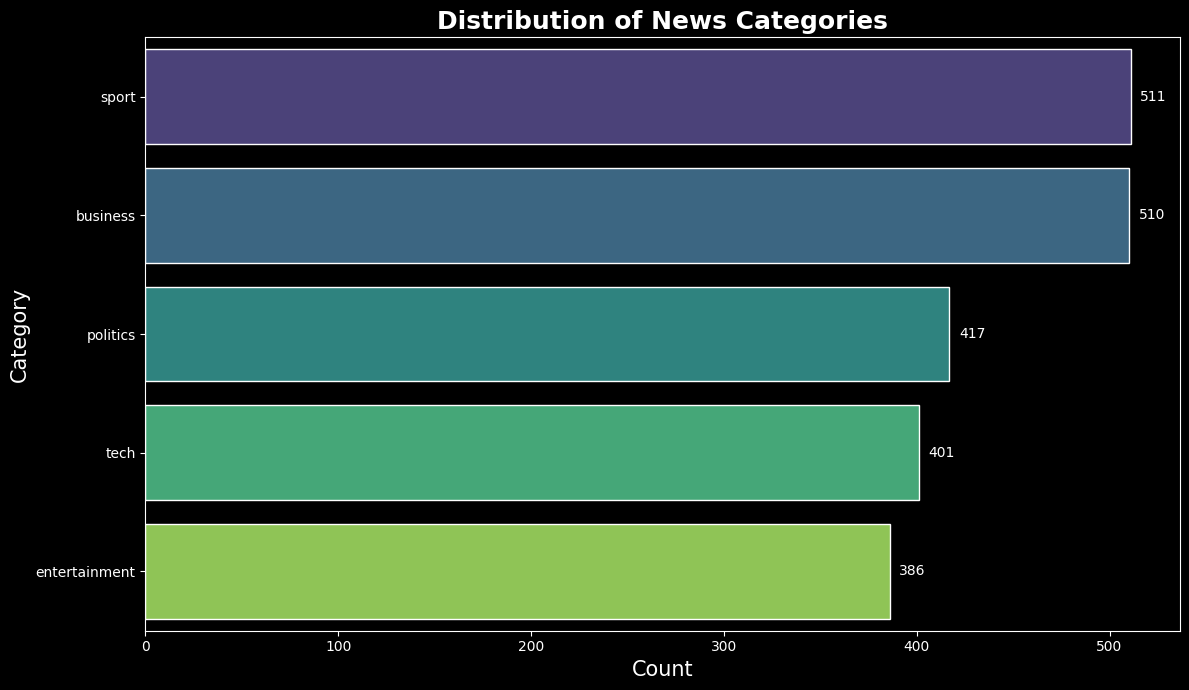

In [ ]:
print("\n--- Category Distribution ---")
category_counts = bbc_df['category'].value_counts()
print(category_counts)

plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x=category_counts.values,
    y=category_counts.index,
    hue=category_counts.index,
    palette="viridis",
    legend=False
)

plt.title('Distribution of News Categories', fontsize=18, fontweight='bold')
plt.xlabel('Count', fontsize=15)
plt.ylabel('Category', fontsize=15)
# add value labels at the end of each bar
for i, v in enumerate(category_counts.values):
    ax.text(v + 5, i, str(v), va='center')
for i, bar in enumerate(ax.patches):
    bar.set_edgecolor('white')
    bar.set_linewidth(1)

plt.tight_layout()
plt.show()


### 2. Text Length

In [30]:
print("\n--- Text Length Analysis ---")
bbc_df['original_length'] = bbc_df['text'].apply(len)
bbc_df['cleaned_length'] = bbc_df['cleaned_text'].apply(len)
bbc_df['normalized_length'] = bbc_df['normalized_text'].apply(len)

print("Original text length statistics:")
print(bbc_df['original_length'].describe())
print("\nCleaned text length statistics:")
print(bbc_df['cleaned_length'].describe())
print("\nNormalized text length statistics:")
print(bbc_df['normalized_length'].describe())



--- Text Length Analysis ---
Original text length statistics:
count     2225.000000
mean      2265.160449
std       1364.094764
min        503.000000
25%       1448.000000
50%       1967.000000
75%       2804.000000
max      25485.000000
Name: original_length, dtype: float64

Cleaned text length statistics:
count     2225.000000
mean      2178.273708
std       1321.890381
min        490.000000
25%       1383.000000
50%       1888.000000
75%       2714.000000
max      24809.000000
Name: cleaned_length, dtype: float64

Normalized text length statistics:
count     2225.000000
mean      1516.803146
std        872.918587
min        338.000000
25%        976.000000
50%       1326.000000
75%       1881.000000
max      15810.000000
Name: normalized_length, dtype: float64


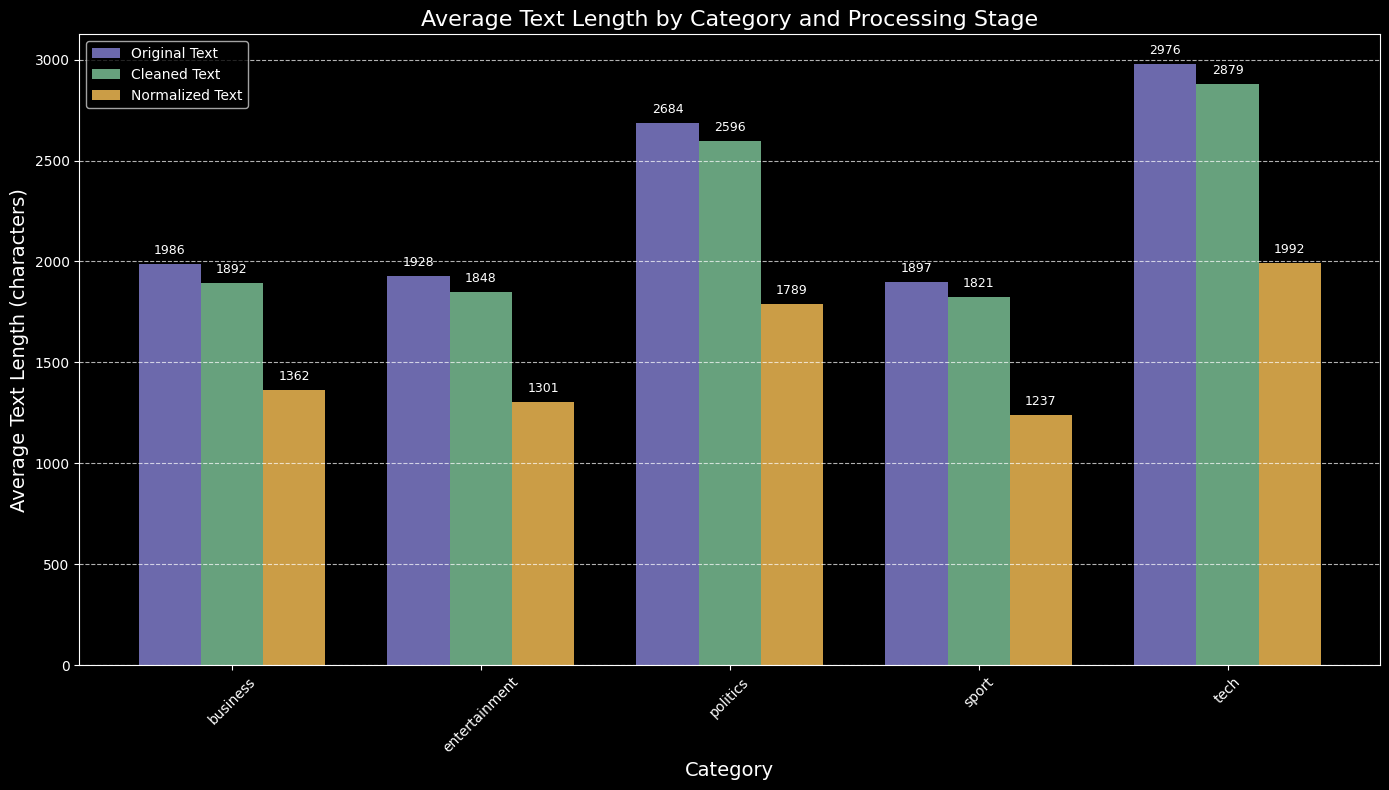

In [ ]:
category_lengths = bbc_df.groupby('category').agg({
    'original_length': 'mean',
    'cleaned_length': 'mean',
    'normalized_length': 'mean'
}).reset_index()

plt.figure(figsize=(14, 8))
pos = list(range(len(category_lengths['category'])))
width = 0.25

plt.bar([p - width for p in pos],
        category_lengths['original_length'],
        width,
        alpha=0.8,
        color='#8884d8',
        label='Original Text')

plt.bar(pos,
        category_lengths['cleaned_length'],
        width,
        alpha=0.8,
        color='#82ca9d',
        label='Cleaned Text')

plt.bar([p + width for p in pos],
        category_lengths['normalized_length'],
        width,
        alpha=0.8,
        color='#ffc658',
        label='Normalized Text')

plt.xlabel('Category', fontsize=14)
plt.ylabel('Average Text Length (characters)', fontsize=14)
plt.title('Average Text Length by Category and Processing Stage', fontsize=16)
plt.xticks([p for p in pos], category_lengths['category'], rotation=45)
plt.legend(['Original Text', 'Cleaned Text', 'Normalized Text'], loc='upper left')

for i in range(len(pos)):
    plt.text(pos[i] - width, category_lengths['original_length'][i] + 50,
             f'{int(category_lengths["original_length"][i])}',
             ha='center', fontsize=9)
    plt.text(pos[i], category_lengths['cleaned_length'][i] + 50,
             f'{int(category_lengths["cleaned_length"][i])}',
             ha='center', fontsize=9)
    plt.text(pos[i] + width, category_lengths['normalized_length'][i] + 50,
             f'{int(category_lengths["normalized_length"][i])}',
             ha='center', fontsize=9)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


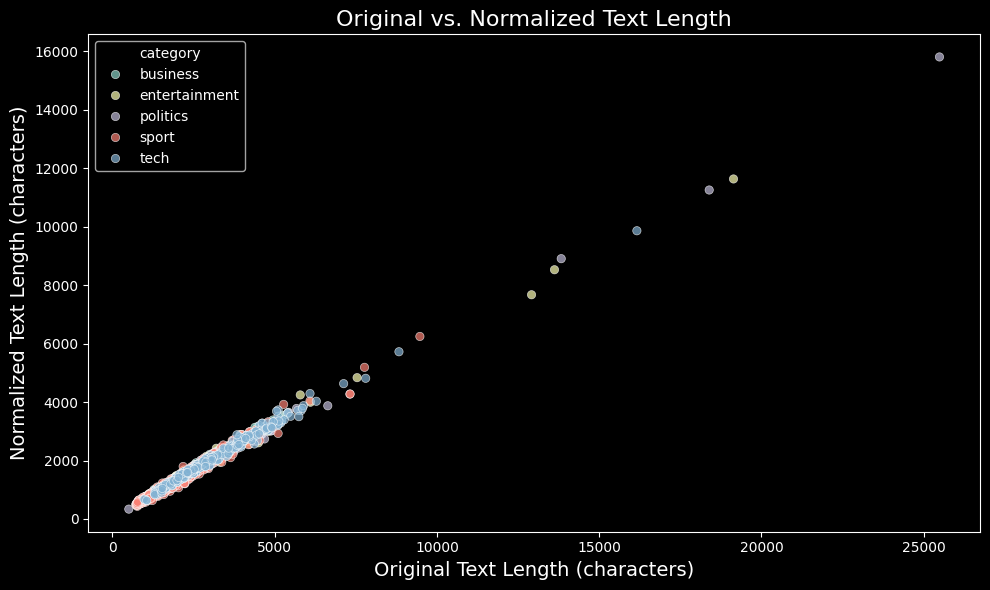

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='original_length', y='normalized_length', hue='category', data=bbc_df, alpha=0.7)
plt.title('Original vs. Normalized Text Length', fontsize=16)
plt.xlabel('Original Text Length (characters)', fontsize=14)
plt.ylabel('Normalized Text Length (characters)', fontsize=14)
plt.tight_layout()
plt.show()

### 3. Word Count

In [33]:
print("\n--- Word Count Analysis ---")
bbc_df['word_count_original'] = bbc_df['text'].apply(lambda x: len(x.split()))
bbc_df['word_count_cleaned'] = bbc_df['cleaned_text'].apply(lambda x: len(x.split()))
bbc_df['word_count_normalized'] = bbc_df['normalized_text'].apply(lambda x: len(x.split()))

print("Word count statistics (original):")
print(bbc_df['word_count_original'].describe())
print("\nWord count statistics (cleaned):")
print(bbc_df['word_count_cleaned'].describe())
print("\nWord count statistics (normalized):")
print(bbc_df['word_count_normalized'].describe())



--- Word Count Analysis ---
Word count statistics (original):
count    2225.000000
mean      384.040449
std       238.174497
min        89.000000
25%       246.000000
50%       332.000000
75%       471.000000
max      4432.000000
Name: word_count_original, dtype: float64

Word count statistics (cleaned):
count    2225.000000
mean      386.266067
std       240.370787
min        90.000000
25%       247.000000
50%       335.000000
75%       473.000000
max      4469.000000
Name: word_count_cleaned, dtype: float64

Word count statistics (normalized):
count    2225.000000
mean      218.463820
std       125.853363
min        48.000000
25%       141.000000
50%       191.000000
75%       270.000000
max      2198.000000
Name: word_count_normalized, dtype: float64


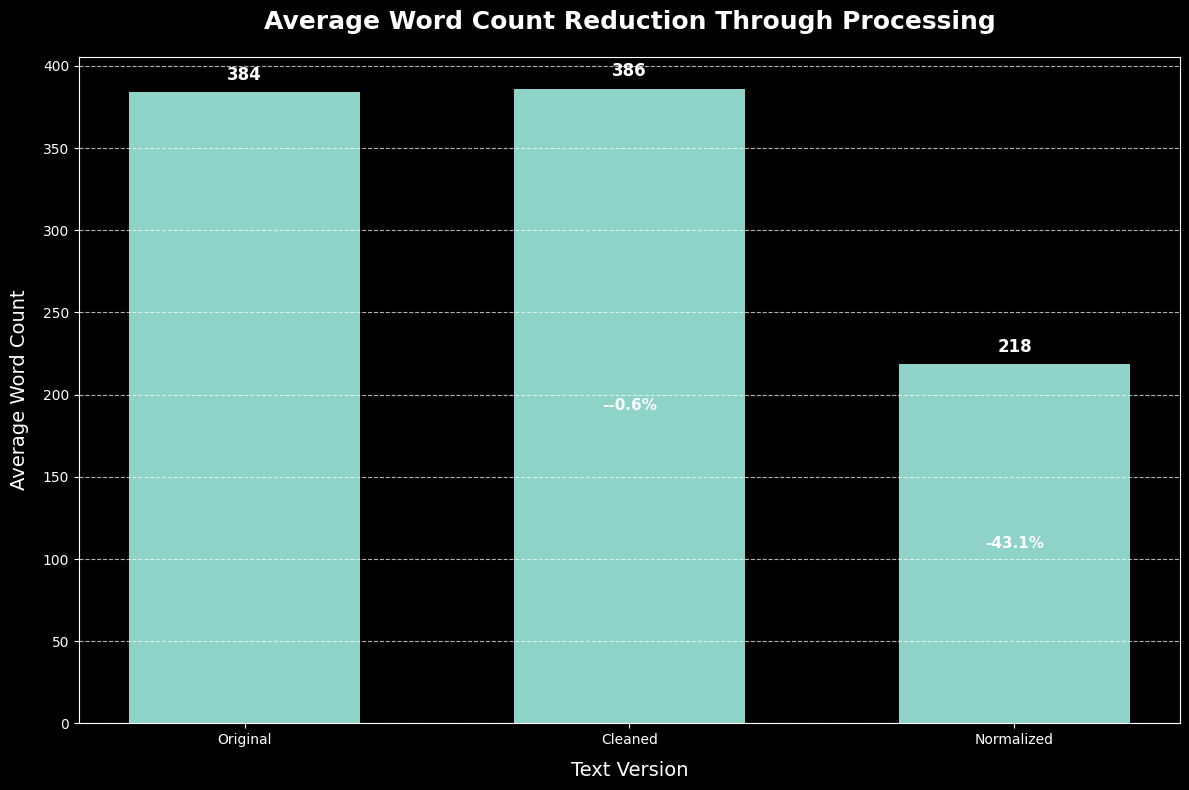

In [ ]:
data = [
    bbc_df['word_count_original'].mean(),
    bbc_df['word_count_cleaned'].mean(),
    bbc_df['word_count_normalized'].mean()
]

bbc_df['normalized_reduction'] = (1 - bbc_df['normalized_length'] / bbc_df['original_length']) * 100
pct_reduction_cleaned = (1 - (data[1] / data[0])) * 100
pct_reduction_normalized = (1 - (data[2] / data[0])) * 100
fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.bar(
    ['Original', 'Cleaned', 'Normalized'],
    data,
    width=0.6,
    linewidth=1
)

for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2.,
        height + 5,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

    if i > 0:
        pct_value = pct_reduction_cleaned if i == 1 else pct_reduction_normalized
        ax.text(
            bar.get_x() + bar.get_width()/2.,
            height / 2,
            f'-{pct_value:.1f}%',
            ha='center',
            va='center',
            fontsize=11,
            color='white',
            fontweight='bold'
        )

ax.set_title('Average Word Count Reduction Through Processing', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Text Version', fontsize=14, labelpad=10)
ax.set_ylabel('Average Word Count', fontsize=14, labelpad=10)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.xaxis.grid(False)
plt.tight_layout()
plt.show()


### 4. Vocabulary

In [35]:
print("\n--- Vocabulary Analysis ---")
def get_vocabulary_size(text_series):
    all_words = ' '.join(text_series).split()
    unique_words = set(all_words)
    return len(unique_words)

original_vocab_size = get_vocabulary_size(bbc_df['text'])
cleaned_vocab_size = get_vocabulary_size(bbc_df['cleaned_text'])
normalized_vocab_size = get_vocabulary_size(bbc_df['normalized_text'])

print(f"Original vocabulary size: {original_vocab_size}")
print(f"Cleaned vocabulary size: {cleaned_vocab_size}")
print(f"Normalized vocabulary size: {normalized_vocab_size}")



--- Vocabulary Analysis ---
Original vocabulary size: 65553
Cleaned vocabulary size: 27906
Normalized vocabulary size: 24749


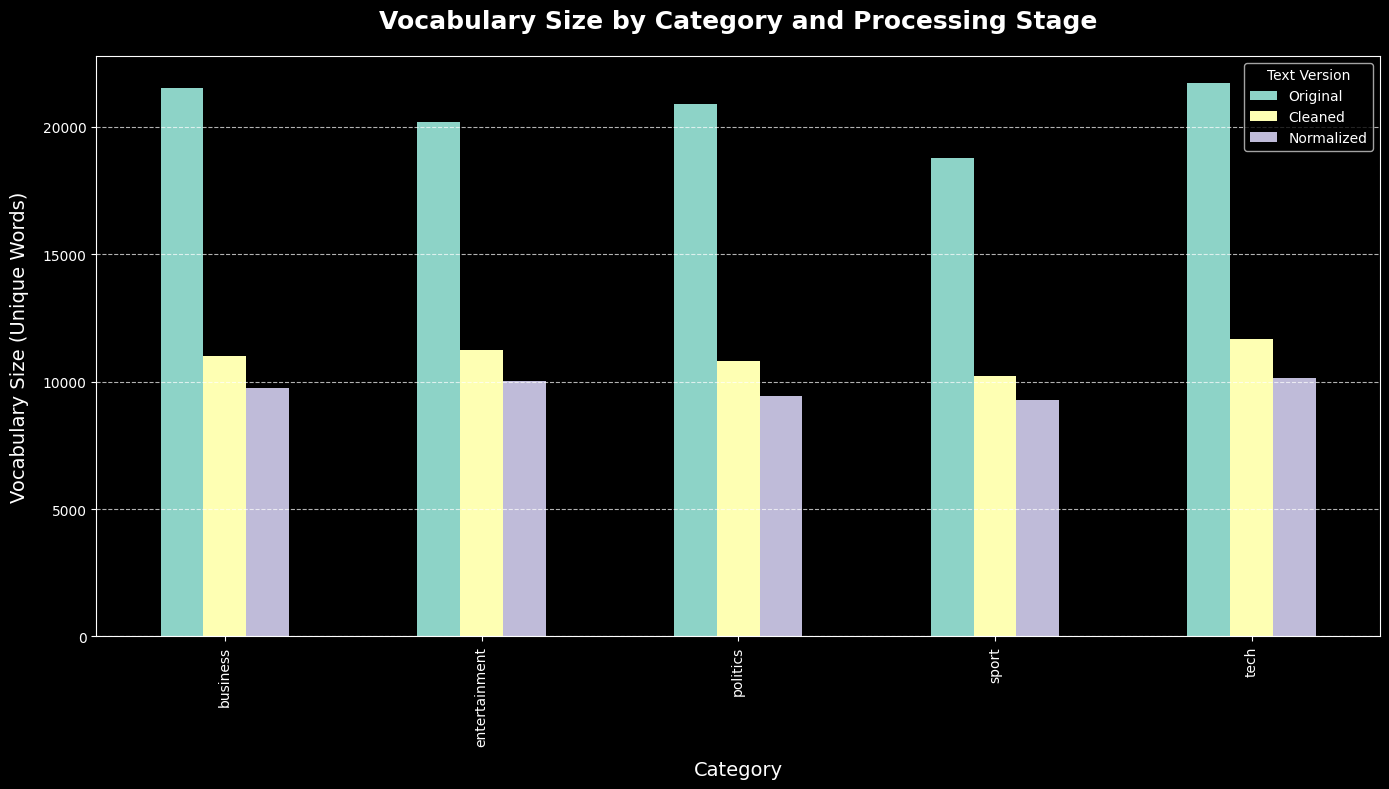

In [ ]:
categories = bbc_df['category'].unique()
category_vocab_sizes = {}

for category in categories:
    category_data = bbc_df[bbc_df['category'] == category]
    category_vocab_sizes[category] = {
        'Original': get_vocabulary_size(category_data['text']),
        'Cleaned': get_vocabulary_size(category_data['cleaned_text']),
        'Normalized': get_vocabulary_size(category_data['normalized_text'])
}

category_df = pd.DataFrame(category_vocab_sizes).T
fig, ax = plt.subplots(figsize=(14, 8))
category_df.plot(kind='bar', ax=ax)
ax.set_title('Vocabulary Size by Category and Processing Stage', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Category', fontsize=14, labelpad=10)
ax.set_ylabel('Vocabulary Size (Unique Words)', fontsize=14, labelpad=10)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.legend(title='Text Version')
plt.tight_layout()
plt.show()


### 5. YData

In [37]:
profile = ProfileReport(
    bbc_df,
    title="BBC Dataset Report",
    explorative=True
)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:02<00:00,  5.06it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Conclusion

- The dataset contains 2,225 entries with 5 columns (file_name, category, text, cleaned_text, normalized_text).
- All columns are complete with no missing values.
- All data is stored as text (object dtype).
- The dataset is well-balanced across five categories: sport (511), business (510), politics (417), tech (401), and entertainment (386).
- Normalization reduced word count by ~43% (384 → 218).
- Vocabulary: Normalized: 24,749 terms (62.2% reduction from original)
- High standard deviation in text length across all processing stages indicates significant variability in article length.
- The interquartile range (25%-75%) shows most articles fall between 246-471 words in original form.